In [1]:
import os
import librosa

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 
          'jazz', 'metal', 'pop', 'reggae', 'rock']

audio_files = {}

for g in genres:
  audio_files[g] = []

for g in genres:
  for audio in os.listdir(f'./genres/{g}'):
    audio_files[g].append(librosa.core.load(f'./genres/{g}/{audio}'))

In [31]:
import numpy as np
from sklearn.decomposition import PCA

mel_specs = []

for g in genres:
  print(g)

  for audio in audio_files[g]:

    y = audio[0]
    sr = audio[1]

    S = np.abs(librosa.stft(y))

    # spect = librosa.feature.melspectrogram(y=y, sr=sr) # , n_fft=2048, hop_length=1024
    spect = librosa.power_to_db(S**2, ref=np.median)
        
# On modifie la taille des images 128 x 660 en gardant les paramètres proposés dans l'article initial
    # if spect.shape[1] != 660:
    # spect.resize(1000,1200, refcheck=False)
      # print(spect.shape)
      # spect.reshape(128, 1293)

    spect = spect[:1000,:1220]
    # print(spect.shape)
    new_shape = (100,122)
    # downsampled_array = spect.reshape(new_shape[0], -1, spect.shape[1]//new_shape[1], new_shape[1]).mean(3).mean(1)
    block_height = spect.shape[0] // new_shape[0]
    block_width = spect.shape[1] // new_shape[1]

    downsampled_array = spect.reshape(new_shape[0], block_height, new_shape[1], block_width).mean(3).mean(1)

    # spect.reshape(20,610)

    # Compress image !
    # target_shape = (100, 122)
    # pca = PCA(n_components=target_shape[1])
    # compressed_array = pca.fit_transform(spect)

    # restored_array = pca.inverse_transform(compressed_array)

    # final_compressed_array = restored_array[:target_shape[0], :target_shape[1]]

    mel_specs.append(downsampled_array)
        
X = np.array(mel_specs)

blues
classical
country
disco
hiphop
jazz
metal
pop
reggae
rock


In [32]:
print(X)

[[[ 12.185118     9.624434    12.063096   ...   6.401529     7.299245
    10.004257  ]
  [ 40.81178     41.523335    42.184776   ...  33.969627    36.985683
    36.782585  ]
  [ 27.045597    27.546162    30.619343   ...  34.87533     25.171736
    17.873213  ]
  ...
  [-11.507751   -11.507751   -11.507751   ... -11.507751   -11.507751
   -11.507751  ]
  [-11.507751   -11.507751   -11.507751   ... -11.507751   -11.507751
   -11.507751  ]
  [-11.507751   -11.507751   -11.507751   ... -11.507751   -11.507751
   -11.507751  ]]

 [[ 35.233185    32.168232    34.354546   ...  34.014366    29.862925
    29.48758   ]
  [ 33.79459     32.639854    34.169647   ...  33.3988      21.04463
    22.97456   ]
  [ 36.48295     43.138374    39.884      ...  32.822136    16.70673
    19.30814   ]
  ...
  [-10.075851   -10.075851   -10.075851   ... -10.075851   -10.075851
   -10.075851  ]
  [-10.075851   -10.075851   -10.075851   ... -10.075851   -10.075851
   -10.075851  ]
  [-10.075851   -10.075851   -1

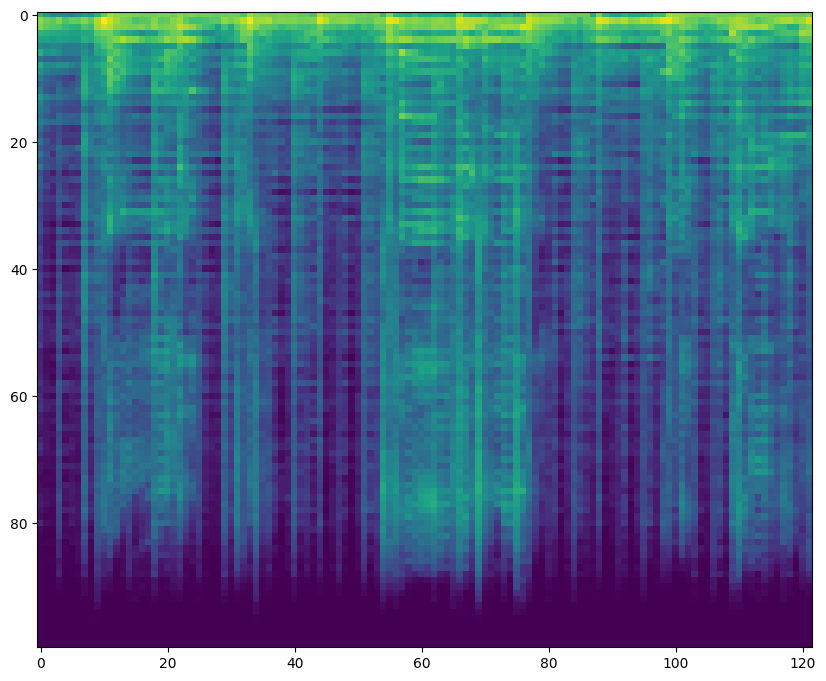

In [33]:
import matplotlib.pyplot as plt

# Specify the dimensions of the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(mel_specs[200])

# Show the plot
plt.show()

In [34]:
# y_cnn = []
# for i in range(len(genres)):
#   if i == 5:
#     y_cnn += 99*[i] # Jazz special case
#   else:
#     y_cnn += 100*[i] # On a 100 images pour chaque genre

# y_cnn = np.array(y_cnn)
y_cnn = []
for i in range(len(genres)):
  y_cnn += 100*[i] # On a 100 images pour chaque genre

y_cnn = np.array(y_cnn)

In [35]:
import tensorflow
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

y_cnn = to_categorical(y_cnn)
print(X.shape)
print(y_cnn.shape)
x_cnn_train, x_cnn_test, y_cnn_train, y_cnn_test = train_test_split(X, y_cnn, test_size=0.2)

(1000, 100, 122)
(1000, 10)


In [36]:
# Nomralisation
x_cnn_train /= np.min(x_cnn_train)
x_cnn_test /= np.min(x_cnn_train)

In [37]:
print(x_cnn_train.shape)
print(x_cnn_test.shape)

(800, 100, 122)
(200, 100, 122)


In [38]:
x_cnn_train = x_cnn_train.reshape(x_cnn_train.shape[0], 100, 122, 1)
x_cnn_test = x_cnn_test.reshape(x_cnn_test.shape[0], 100, 122, 1)

In [39]:
print(x_cnn_train.shape)
print(y_cnn_train.shape)

(800, 100, 122, 1)
(800, 10)


In [40]:
import tensorflow as tf


# model = tf.keras.models.Sequential()

# model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  input_shape=(128,660,1)))

# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(tf.keras.layers.Conv2D(64, 
#                  kernel_size=(3, 3), 
#                  activation='relu'))

# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(tf.keras.layers.Dropout(0.3))

# model.add(tf.keras.layers.Conv2D(32, 
#                  kernel_size=(3, 3), 
#                  activation='relu'))

# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dropout(0.3))
# model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dense(32, activation='relu'))

# model.add(tf.keras.layers.Dense(10, activation='softmax'))
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(100, 122, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 120, 16)       160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 49, 60, 16)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 47040)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                3010624   
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 3011434 (11.49 MB)
Trainable params: 3011434 (11.49 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [41]:
import tensorflow

optimizer = tensorflow.keras.optimizers.Adam() # learning_rate=0.0001

model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

In [42]:
#tf.keras.backend.clear_session()

In [43]:
history = model.fit(x_cnn_train,
                    y_cnn_train,
                    epochs=20,
                    batch_size=15,
                    validation_data = (x_cnn_test,y_cnn_test))

Epoch 1/20
54/54 [==============================] - 2s 33ms/step - loss: 1.9957 - accuracy: 0.2962 - val_loss: 19.9914 - val_accuracy: 0.4450
Epoch 2/20
54/54 [==============================] - 2s 31ms/step - loss: 1.3785 - accuracy: 0.5362 - val_loss: 32.6596 - val_accuracy: 0.3800
Epoch 3/20
54/54 [==============================] - 2s 29ms/step - loss: 1.0221 - accuracy: 0.6725 - val_loss: 26.3273 - val_accuracy: 0.5200
Epoch 4/20
54/54 [==============================] - 2s 30ms/step - loss: 0.7213 - accuracy: 0.8012 - val_loss: 18.1714 - val_accuracy: 0.5500
Epoch 5/20
54/54 [==============================] - 2s 31ms/step - loss: 0.5618 - accuracy: 0.8562 - val_loss: 31.4037 - val_accuracy: 0.5250
Epoch 6/20
54/54 [==============================] - 2s 31ms/step - loss: 0.3482 - accuracy: 0.9312 - val_loss: 23.4635 - val_accuracy: 0.5950
Epoch 7/20
54/54 [==============================] - 2s 30ms/step - loss: 0.2525 - accuracy: 0.9600 - val_loss: 27.8142 - val_accuracy: 0.5850
Epoch 

In [44]:
import keras

model.save("my_model_cnn_v3.keras")
# model = keras.models.load_model('my_model_cnn_v1.keras')

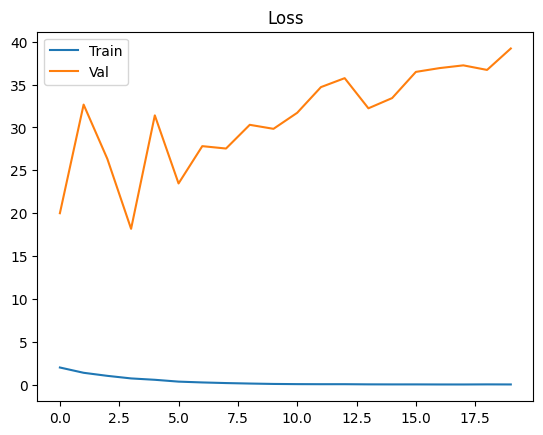

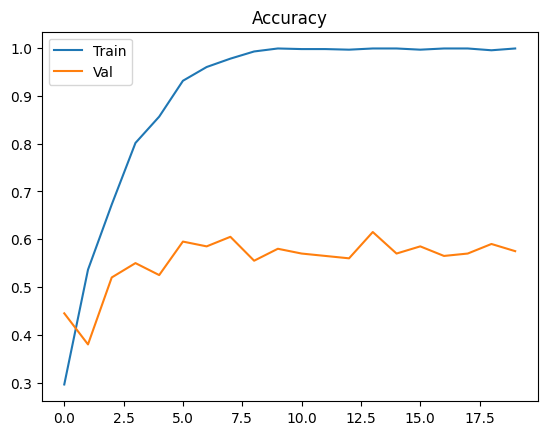

In [45]:
import matplotlib.pyplot as plt

loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()